In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tea_df = pd.read_csv("scraper/clean_data.csv")
tea_df.head()

,id,name,brand,reviewCount,ratingValue,teaType,ingredients,flavors,soldIn,caffeine,certification,wantIt,ownIt,imageUrl
0,65303,2015 Last Thoughts,White 2 Tea,16.0,89.0,Pu-erh Tea,Not available,"Floral, Rainforest, Honeysuckle, Orchids, Pepp...",Not available,Not available,Not available,51.0,20.0,https://media.steepster.com/api/file/kL8dCqJrT...
1,43095,Golden Orchid,Whispering Pines Tea Company,155.0,89.0,Black Tea,"Fujian Xiao Zhong, Vanilla Bean, Yunnan Dian Hong","Dark Chocolate, Chocolate, Dates, Malt, Orchid...",Loose Leaf,High,Not available,315.0,236.0,https://media.steepster.com/api/file/exT0OHWdT...
2,78801,The Silver Moonlight,Chai & Mighty,6.0,89.0,White Tea,White Tea Leaves,"Honey, Lemon, Nuts, Flowers, Lemongrass",Loose Leaf,Low,"Fair Trade, Organic, Vegan",3.0,4.0,https://media.steepster.com/api/file/cmNMAbwSn...
3,48058,Cocoa Amore,Whispering Pines Tea Company,85.0,89.0,Black Tea,"Chinese Black Tea, Tahitian Vanilla","Cocoa, Dark Chocolate, Malt, Vanilla, Apple, A...",Loose Leaf,High,Not available,227.0,156.0,https://media.steepster.com/api/file/0vAf5X4Si...
4,32444,Laoshan Bilochun Green,Verdant Tea,19.0,89.0,Green Tea,Not available,"Sweet, Mineral, Nutty, Roasted, Salty, Butter,...",Not available,Not available,Not available,11.0,21.0,https://media.steepster.com/api/file/F0AJQO5DT...


### Indexing flavors

In [3]:
flavors = set()
for tea in tea_df['flavors']:
    for flavs in tea.split(","):
        flavors.add(flavs.strip().title())

ordered_flavors = sorted(list(flavors))
number_of_flavors = len(flavors)

print("Total number of flavors:", number_of_flavors)

flavor_to_index = {}
index_to_flavor = {}
i = 0
for flavor in ordered_flavors:
    flavor_to_index[flavor] = i
    index_to_flavor[i] = flavor
    i += 1
    
print("Index of Floral:", flavor_to_index["Floral"], "\nFlavor with index 5:", index_to_flavor[4])

Total number of flavors: 358
Index of Floral: 118 
Flavor with index 5: Apple


### One-hot encoding for Tea Flavors

In [4]:
number_of_teas = tea_df.shape[0]
flavor_mat = np.zeros((number_of_teas, number_of_flavors))

for row in range(number_of_teas):
    for flvr in set([flvr.strip().title() for flvr in tea_df.flavors[row].split(',')]):
        flavor_mat[row][flavor_to_index[flvr]] = 1

flavor_mat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [5]:
print("Flavors of 1st tea:", sorted([flvr.strip().title() for flvr in tea_df.flavors[0].split(',')]))

flavor_df = pd.DataFrame(data=flavor_mat, columns=index_to_flavor.values())
flavor_df.head()

Flavors of 1st tea: ['Apple Skins', 'Floral', 'Grapes', 'Honeysuckle', 'Lemon', 'Orchids', 'Pepper', 'Peppercorn', 'Rainforest', 'Sweet', 'Vegetal', 'Vinegar', 'Winter Honey', 'Zucchini']


,Absinthe,Alcohol,Almond,Anise,Apple,Apple Candy,Apple Skins,Apricot,Artichoke,Artificial,...,White Chocolate,White Grapes,White Wine,Winter Honey,Wood,Yams,Yeast,Yeasty,Yogurt,Zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One-hot encoding for Tea Types

In [6]:
teaType_dummy = pd.get_dummies(tea_df.teaType)

In [7]:
teaType_count = teaType_dummy.sum(axis = 0)
print("Number of unique tea type:", teaType_count.shape[0])

Number of unique tea type: 231


In [8]:
teaType_count.sort_values()[:20]

Flowering Fruit Pu-erh Rooibos Blend                    1
Food Matcha Blend                                       1
Food Green Herbal Blend                                 1
Food Fruit Yerba maté Blend                             1
Flowering Yerba maté Blend                              1
Flowering Oolong Blend                                  1
Flowering Herbal White Blend                            1
Flowering Green White Blend                             1
Flowering Fruit Rooibos Blend                           1
Flowering Fruit Herbal White Blend                      1
Flowering Fruit Herbal Rooibos Blend                    1
Flowering Fruit Green White Blend                       1
Flowering Food Herbal Blend                             1
Food Oolong Blend                                       1
Flowering Food Fruit Herbal Rooibos Yerba maté Blend    1
Chai Oolong White Blend                                 1
Chai Matcha Blend                                       1
Chai Green Yer

In [9]:
teaType_count.sort_values(ascending=False)[:20]

Black Tea               4042
Green Tea               2112
Pu-erh Tea              1896
Oolong Tea              1842
Herbal Tea              1037
White Tea                591
Rooibos Tea              520
Black Fruit Blend        397
Fruit Herbal Blend       336
Black Chai Blend         221
Tea                      212
Fruit Green Blend        188
Fruit Tea                170
Matcha Tea               116
Herbal Rooibos Blend     108
Green Herbal Blend       107
Chai Tea                  80
Yerba maté Tea            80
Fruit White Blend         77
Fruit Rooibos Blend       72
dtype: int64

### One-hot encoding for Brands

In [10]:
brand_dummies = pd.get_dummies(tea_df.brand)

#### Many invalid inputs in "Brand"

In [11]:
brand_count = brand_dummies.sum(axis=0)
brand_count[brand_count==1]

1001Kruiden                                                     1
365 Organic                                                     1
:D                                                              1
A Tea Affair                                                    1
ABC Tea                                                         1
ABC Tea House                                                   1
AKA Dwelling                                                    1
AMANA                                                           1
ASDA                                                            1
ASI Tea company                                                 1
Aap Ki Pasand                                                   1
Adagio Custom Blends, Aun-Juli Riddle                           1
Adagio Custom Blends, Brittany Kienke                           1
Adagio Custom Blends, Cheryl Yi                                 1
Adagio Custom Blends, Elizabeth Lane                            1
Adagio Cus

### One-hot encoding for Ingredients

In [12]:
ingredients_dummy = tea_df.ingredients.str.get_dummies(sep=', ')

In [13]:
ingredients_count = ingredients_dummy.sum(axis = 0).sort_values()

print("Number of ingredients in only one tea:", ingredients_count[ingredients_count == 1].shape[0])
ingredients_count[ingredients_count == 1]

Number of ingredients in only one tea: 44


Organic Chocolate Mint            1
Organic Helichrysum Flowers       1
Organic Sourenee Second Flush     1
Papaya Leaf                       1
Candied Macadamia Nuts            1
Candied Hazelnuts                 1
California Oranges                1
Celery Seed                       1
Cake Flavor                       1
Pink Lotus Flavor                 1
Bunny Grahams (Vegan)             1
Buffalo Grass                     1
Saffron Krokos Kozanis            1
Shankpushpi Leaf                  1
Black Mission Figs                1
Cactus Flowers                    1
Billberry Leaf                    1
Fleur De Sel                      1
Nilgiri Frost Oolong              1
English Toffee                    1
Goji                              1
Dried Tomato                      1
Green Peppercorn                  1
Dried Cantaloupe                  1
Hazelnut Leaves                   1
Chewy Caramel                     1
Dairy                             1
Khongea Golden Tipppy Assam 

### One-hot encoding for Certtification

In [14]:
certification_dummy = tea_df.certification.str.get_dummies(sep=', ')

In [15]:
certification_count = certification_dummy.sum(axis = 0).sort_values()
certification_count

Kosher             272
Vegan              301
Fair Trade         426
Organic           1693
Not available    13559
dtype: int64

### One-hot encoding for Sold In and Caffeine

In [16]:
soldIn_caffeine_dummy = pd.get_dummies(tea_df[["soldIn", "caffeine"]])

In [17]:
soldIn_caffeine_dummy.sum(axis = 0)

soldIn_Bulk                                   288
soldIn_Bulk, Loose Leaf                       781
soldIn_Bulk, Loose Leaf, Sachet                63
soldIn_Bulk, Loose Leaf, Sachet, Tea Bag       17
soldIn_Bulk, Loose Leaf, Tea Bag               52
soldIn_Bulk, Sachet                             4
soldIn_Bulk, Sachet, Tea Bag                    4
soldIn_Bulk, Tea Bag                           16
soldIn_Loose Leaf                            6229
soldIn_Loose Leaf, Sachet                     233
soldIn_Loose Leaf, Sachet, Tea Bag             25
soldIn_Loose Leaf, Tea Bag                    186
soldIn_Not available                         6637
soldIn_Sachet                                 198
soldIn_Sachet, Tea Bag                         13
soldIn_Tea Bag                                895
caffeine_Caffeine Free                       1386
caffeine_Decaffeinated                        124
caffeine_High                                 923
caffeine_Low                                  785


### Features Representation

In [18]:
tea_df_dummy = pd.concat([flavor_df, teaType_dummy, ingredients_dummy,\
                          certification_dummy, soldIn_caffeine_dummy, \
                          tea_df[['reviewCount','ratingValue', 'wantIt', 'ownIt']]], axis = 1)

In [19]:
tea_df_dummy.head()

,Absinthe,Alcohol,Almond,Anise,Apple,Apple Candy,Apple Skins,Apricot,Artichoke,Artificial,...,caffeine_Caffeine Free,caffeine_Decaffeinated,caffeine_High,caffeine_Low,caffeine_Medium,caffeine_Not available,reviewCount,ratingValue,wantIt,ownIt
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,16.0,89.0,51.0,20.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,155.0,89.0,315.0,236.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,6.0,89.0,3.0,4.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,85.0,89.0,227.0,156.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,19.0,89.0,11.0,21.0


### SVD

In [20]:
from sklearn.preprocessing import normalize
#row normalize
temp_matrix = normalize(tea_df_dummy.as_matrix(), axis = 0)
svd_matrix = temp_matrix.transpose()

In [21]:
print(type(svd_matrix))
print(svd_matrix.shape)

<class 'numpy.ndarray'>
(1160, 15641)


In [22]:
temp_matrix[0][:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13130643, 0.        , 0.        , 0.        ])

In [23]:
from scipy.sparse.linalg import svds
u, s, v_trans = svds(svd_matrix, k=100)

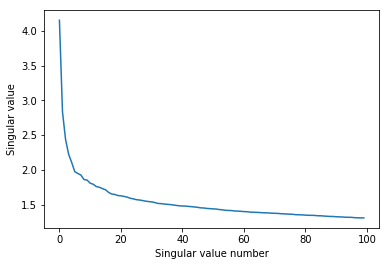

In [24]:
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [25]:
predictors_compressed, _, teas_compressed = svds(svd_matrix, k=20)
teas_compressed = teas_compressed.transpose()

print(predictors_compressed.shape)
print(teas_compressed.shape)

(1160, 20)
(15641, 20)


### project dummy_matrix onto 2D

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(verbose=1)
print(teas_compressed.shape)
subset = teas_compressed[:5000, :]
projected_teas = tsne.fit_transform(subset)
print(projected_teas.shape)

(15641, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.010s...
[t-SNE] Computed neighbors for 5000 samples in 1.253s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.003550
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.804543
[t-SNE] Error after 1000 iterations: 1.574525
(5000, 2)


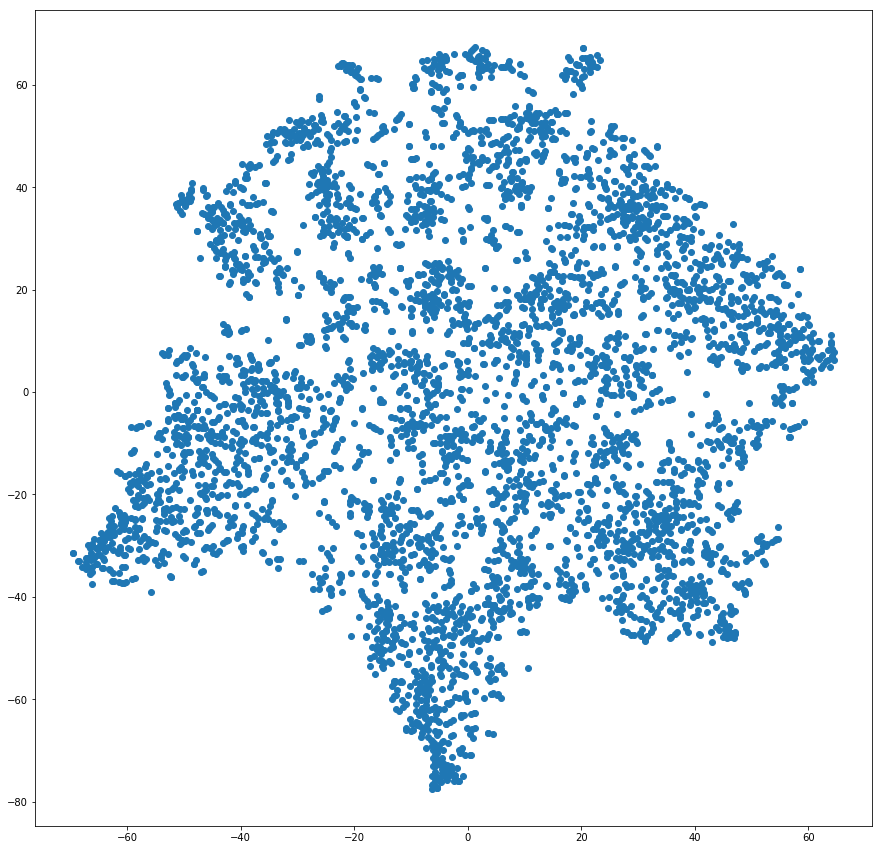

In [28]:
plt.figure(figsize=(15,15))
plt.scatter(projected_teas[:,0],projected_teas[:,1])
plt.show()